In [3]:
# import libraries 

import pandas as pd
import seaborn as sns
import re

import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the configuration of the plots we will create

In [4]:
# read the data

df = pd.read_csv('movies.csv')

In [5]:
# let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# let's see if we have missing data
(df.isna().sum(axis=0)/df.shape[0]).sort_values()

name        0.000000
genre       0.000000
year        0.000000
director    0.000000
star        0.000130
released    0.000261
score       0.000391
votes       0.000391
writer      0.000391
country     0.000391
runtime     0.000522
company     0.002217
rating      0.010042
gross       0.024648
budget      0.283125
dtype: float64

In [7]:
# delete rows without budget or votes or gross informations
new_df = df.copy()
new_df = new_df.drop(new_df[df['budget'].isna()].index,axis=0)
new_df = new_df.drop(new_df[df['gross'].isna()].index,axis=0)
new_df = new_df.drop(new_df[df['votes'].isna()].index,axis=0)
new_df = new_df.drop(new_df[df['runtime'].isna()].index,axis=0)


/tmp/ipykernel_295616/2227700411.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df.drop(new_df[df['gross'].isna()].index,axis=0)
/tmp/ipykernel_295616/2227700411.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df.drop(new_df[df['votes'].isna()].index,axis=0)
/tmp/ipykernel_295616/2227700411.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df.drop(new_df[df['runtime'].isna()].index,axis=0)


In [8]:
(new_df.isna().sum(axis=0)/df.shape[0]).sort_values()

name        0.000000
genre       0.000000
year        0.000000
released    0.000000
score       0.000000
votes       0.000000
director    0.000000
writer      0.000000
star        0.000000
budget      0.000000
gross       0.000000
runtime     0.000000
country     0.000130
company     0.000261
rating      0.001565
dtype: float64

In [9]:
# data types for our columns

new_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
# change budget, votes, gross and runtime types into  int 

new_df['budget'] = new_df['budget'].astype('int64')
new_df['votes'] = new_df['votes'].astype('int64')
new_df['gross'] = new_df['gross'].astype('int64')
new_df['runtime'] = new_df['runtime'].astype('int64')


In [11]:
new_df.dtypes.sort_values()

year          int64
votes         int64
budget        int64
gross         int64
runtime       int64
score       float64
name         object
rating       object
genre        object
released     object
director     object
writer       object
star         object
country      object
company      object
dtype: object

In [12]:
new_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [13]:
#check if there is incoherence between year and released columns 

new_df['released_year']=new_df['released'].apply(lambda x : int(re.search('\d{4}',x).group(0)))

In [14]:
new_df[['name','year','released_year']][(new_df['year'] - new_df['released_year'])!=0]


,name,year,released_year
8,Superman II,1980,1981
11,The Gods Must Be Crazy,1980,1984
21,Heaven's Gate,1980,1981
33,Cattle Annie and Little Britches,1980,1981
96,The Evil Dead,1981,1983
...,...,...,...
7427,Stan & Ollie,2018,2019
7432,Dragon Ball Super: Broly,2018,2019
7462,1917,2019,2020
7525,Weathering with You,2019,2020


#### we googled  these movies and we found that the correct informations are in column "year" 


In [15]:
new_df = new_df.drop(['released','released_year'], axis=1)

In [16]:
new_df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [17]:
# now we will study correlation between columns and gross column

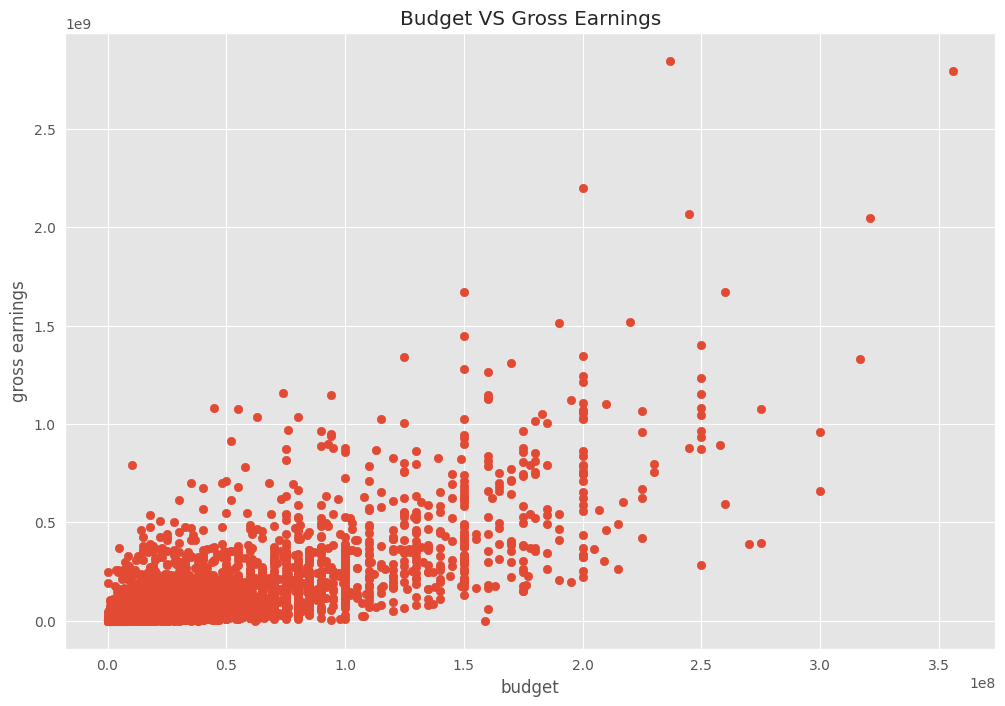

In [18]:
# scatter plot with budget vs gross

plt.scatter(x=new_df.budget,y=new_df.gross)
plt.title('Budget VS Gross Earnings')
plt.xlabel('budget')
plt.ylabel('gross earnings')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

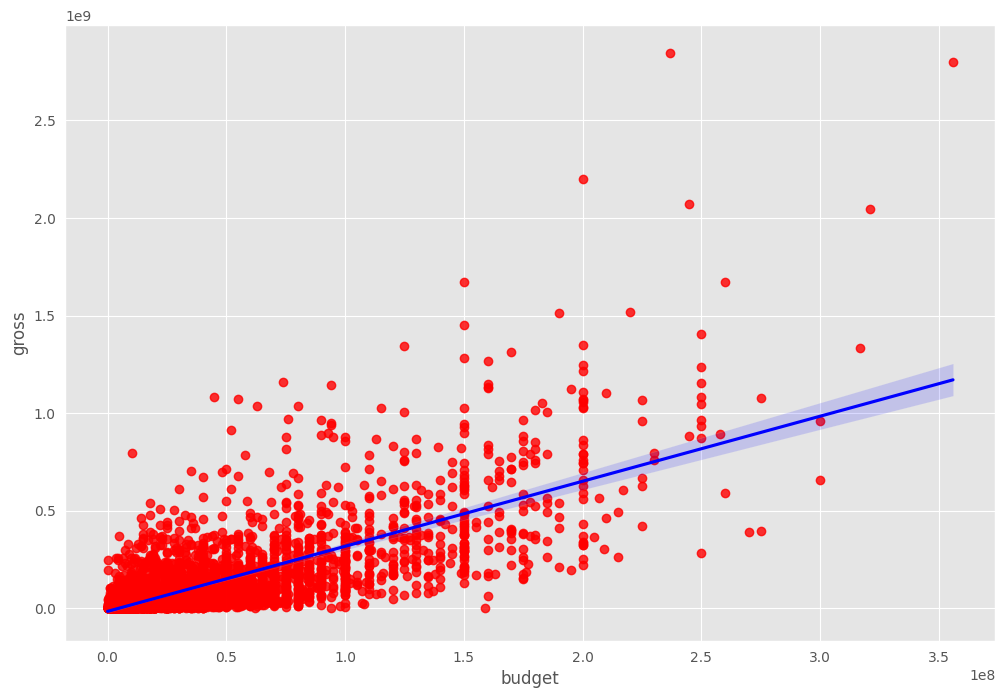

In [19]:
# plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=new_df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [20]:
# read the data

df = pd.read_csv('movies.csv')

In [21]:
# let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [22]:
# let's see if we have missing data
(df.isna().sum(axis=0)/df.shape[0]).sort_values()

name        0.000000
genre       0.000000
year        0.000000
director    0.000000
star        0.000130
released    0.000261
score       0.000391
votes       0.000391
writer      0.000391
country     0.000391
runtime     0.000522
company     0.002217
rating      0.010042
gross       0.024648
budget      0.283125
dtype: float64

In [23]:
# delete rows without budget or votes or gross informations
new_df = df.copy()
new_df = new_df.drop(new_df[df['budget'].isna()].index,axis=0)
new_df = new_df.drop(new_df[df['gross'].isna()].index,axis=0)
new_df = new_df.drop(new_df[df['votes'].isna()].index,axis=0)
new_df = new_df.drop(new_df[df['runtime'].isna()].index,axis=0)


/tmp/ipykernel_295616/2227700411.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df.drop(new_df[df['gross'].isna()].index,axis=0)
/tmp/ipykernel_295616/2227700411.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df.drop(new_df[df['votes'].isna()].index,axis=0)
/tmp/ipykernel_295616/2227700411.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df.drop(new_df[df['runtime'].isna()].index,axis=0)


In [24]:
(new_df.isna().sum(axis=0)/df.shape[0]).sort_values()

name        0.000000
genre       0.000000
year        0.000000
released    0.000000
score       0.000000
votes       0.000000
director    0.000000
writer      0.000000
star        0.000000
budget      0.000000
gross       0.000000
runtime     0.000000
country     0.000130
company     0.000261
rating      0.001565
dtype: float64

In [25]:
# data types for our columns

new_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [26]:
# change budget, votes, gross and runtime types into  int 

new_df['budget'] = new_df['budget'].astype('int64')
new_df['votes'] = new_df['votes'].astype('int64')
new_df['gross'] = new_df['gross'].astype('int64')
new_df['runtime'] = new_df['runtime'].astype('int64')


In [27]:
new_df.dtypes.sort_values()

year          int64
votes         int64
budget        int64
gross         int64
runtime       int64
score       float64
name         object
rating       object
genre        object
released     object
director     object
writer       object
star         object
country      object
company      object
dtype: object

In [28]:
new_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [29]:
#check if there is incoherence between year and released columns 

new_df['released_year']=new_df['released'].apply(lambda x : int(re.search('\d{4}',x).group(0)))

In [30]:
new_df[['name','year','released_year']][(new_df['year'] - new_df['released_year'])!=0]


,name,year,released_year
8,Superman II,1980,1981
11,The Gods Must Be Crazy,1980,1984
21,Heaven's Gate,1980,1981
33,Cattle Annie and Little Britches,1980,1981
96,The Evil Dead,1981,1983
...,...,...,...
7427,Stan & Ollie,2018,2019
7432,Dragon Ball Super: Broly,2018,2019
7462,1917,2019,2020
7525,Weathering with You,2019,2020


#### we googled  these movies and we found that the correct informations are in column "year" 


In [31]:
new_df = new_df.drop(['released','released_year'], axis=1)

In [32]:
new_df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [33]:
# now we will study correlation between columns and gross column

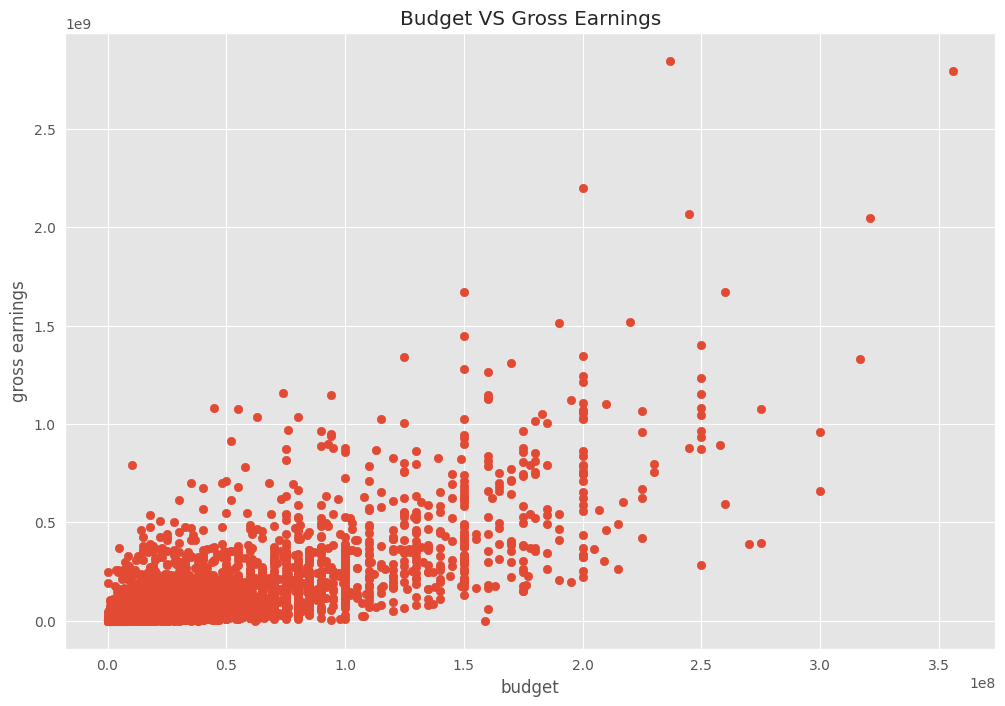

In [34]:
# scatter plot with budget vs gross

plt.scatter(x=new_df.budget,y=new_df.gross)
plt.title('Budget VS Gross Earnings')
plt.xlabel('budget')
plt.ylabel('gross earnings')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

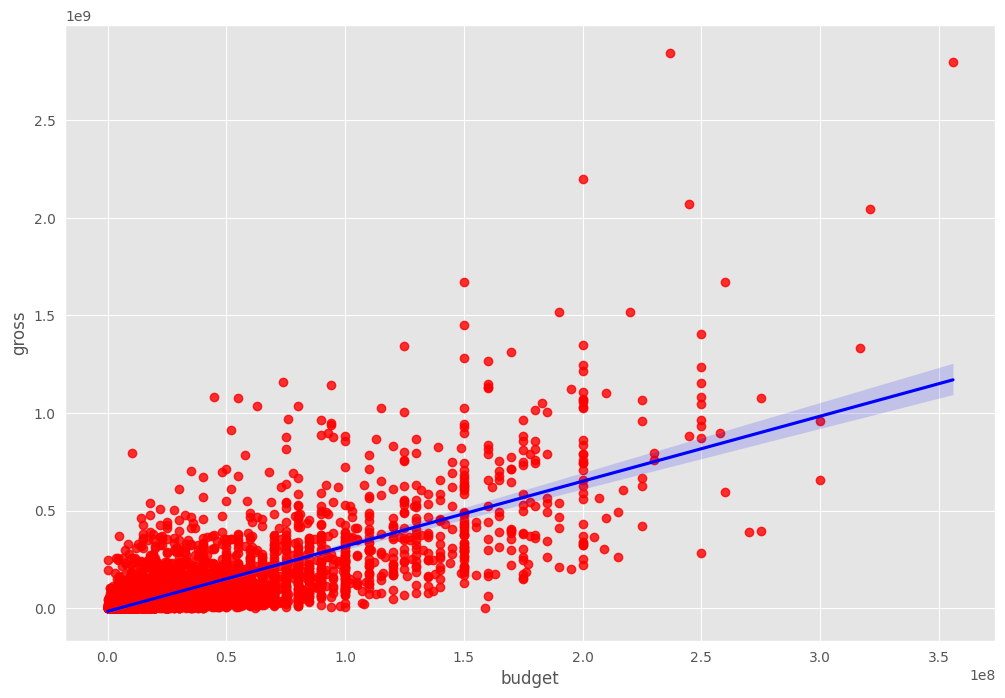

In [35]:
# plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=new_df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [36]:
# let's start look for correlation

In [37]:
new_df.corr(method='pearson') #pearson, kendall, spearman

/tmp/ipykernel_295616/1275549947.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr(method='pearson') #pearson, kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.055391,0.205852,0.327793,0.274354,0.074203
score,0.055391,1.000000,0.473789,0.071821,0.222100,0.414580
votes,0.205852,0.473789,1.000000,0.440035,0.614895,0.352437
budget,0.327793,0.071821,0.440035,1.000000,0.740410,0.318595
gross,0.274354,0.222100,0.614895,0.740410,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


/tmp/ipykernel_295616/416080093.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_correlation = new_df.corr(method='pearson')


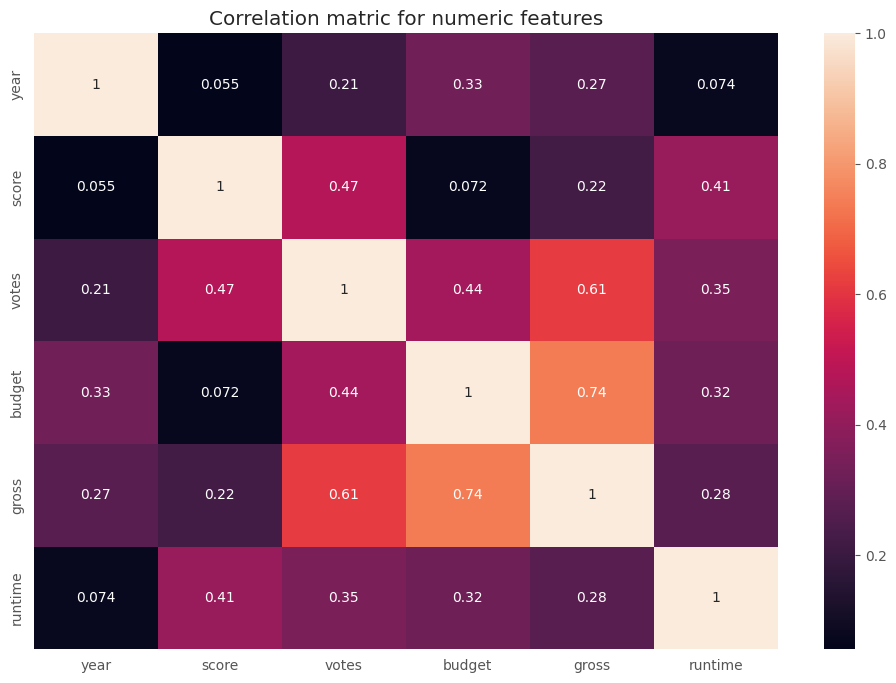

In [38]:
# visualize correlation

matrix_correlation = new_df.corr(method='pearson')
sns.heatmap(matrix_correlation, annot=True)

plt.title('Correlation matric for numeric features')

plt.show()

#### ---> higher correlation for budget and votes

In [39]:
# looks at company feature (qualitatif feature)

# encoding 'company' column

#method1 : with ordinalencoder transformer

from sklearn.preprocessing import OrdinalEncoder

df_numerized = new_df.copy()
encoder = OrdinalEncoder()
df_numerized['company'] = encoder.fit_transform(df_numerized['company'].values.reshape(-1,1))

df_numerized.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,1432.0,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,454.0,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,949.0,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,1114.0,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,1089.0,98


In [40]:
#method2 : classic method

df_numerized2 = new_df.copy()

for col in df_numerized2.columns:
    if(df_numerized2[col].dtype =='object'):
        df_numerized2[col] = df_numerized2[col].astype('category')
        df_numerized2[col] = df_numerized2[col].cat.codes

df_numerized2.head()


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4705,6,6,1980,8.4,927000,1800,2840,700,46,19000000,46998772,1432,146
1,3942,6,1,1980,5.8,65000,1581,1160,215,47,4500000,58853106,454,104
2,3653,4,0,1980,8.7,1200000,759,1822,1161,47,18000000,538375067,949,124
3,205,4,4,1980,7.7,221000,891,1416,1478,47,3500000,83453539,1114,88
4,734,6,4,1980,7.3,108000,721,352,272,47,6000000,39846344,1089,98


In [41]:
new_df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


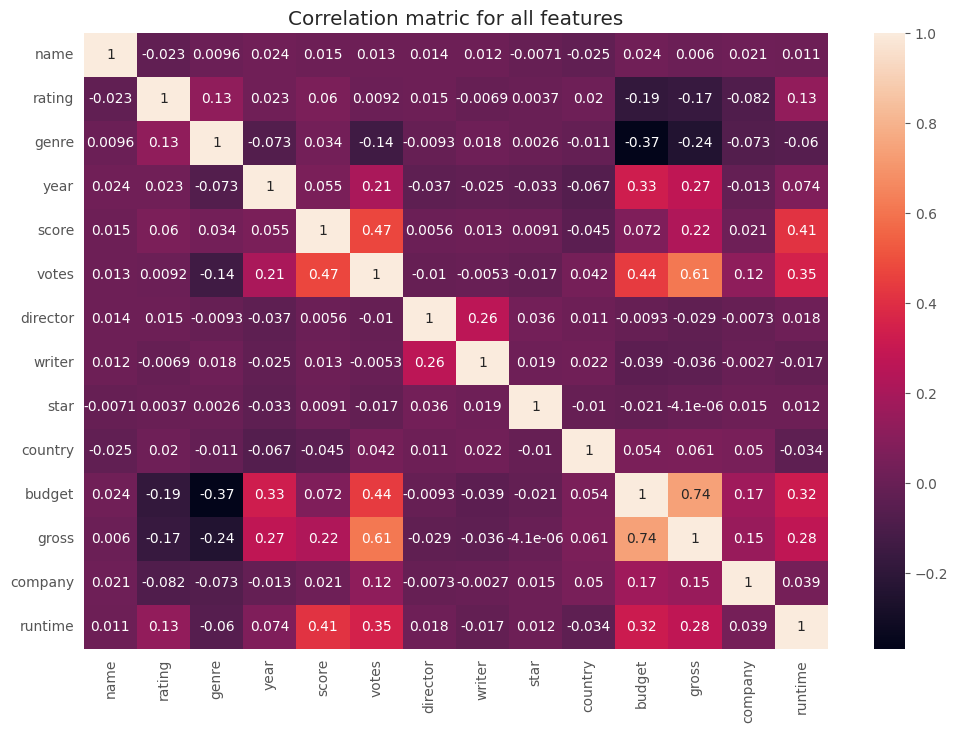

In [42]:
matrix_correlation = df_numerized2.corr(method='pearson')
sns.heatmap(matrix_correlation, annot=True)

plt.title('Correlation matric for all features')

plt.show()

In [ ]:
corr_pairs = matrix_correlation.unstack()
corr_pairs[(corr_pairs>0.5) & (corr_pairs !=1)]

#### --> only budget and votes have a higher correlation with gross column

#### --> only budget and votes have a higher correlation with gross column